<a href="https://colab.research.google.com/github/sergiynesterenko90/feranec/blob/main/Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [426]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [427]:
tf.config.list_physical_devices('GPU')  # check that we actually have a GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Get the handwriting dataset

In [428]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # scale the raw data to the 0-1 range

In [429]:
# x_train = x_train.astype(np.float32)
# x_test = x_test.astype(np.float32)

# Look at the raw data

In [430]:
x_train.shape

(60000, 28, 28)

In [431]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Plot a few of the images

Label: 5


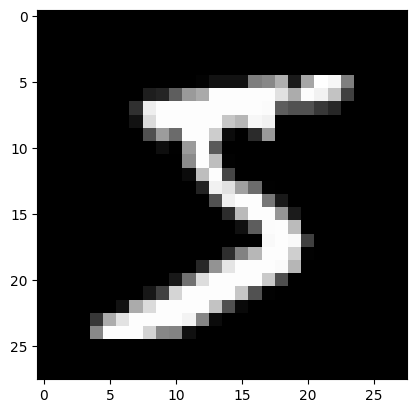

Label: 0


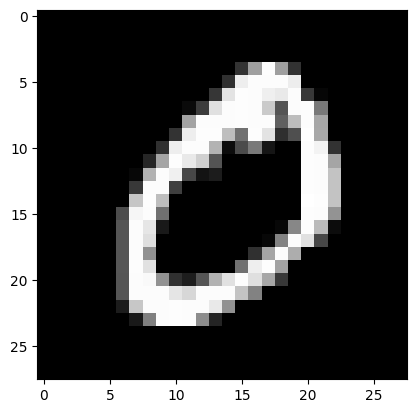

Label: 4


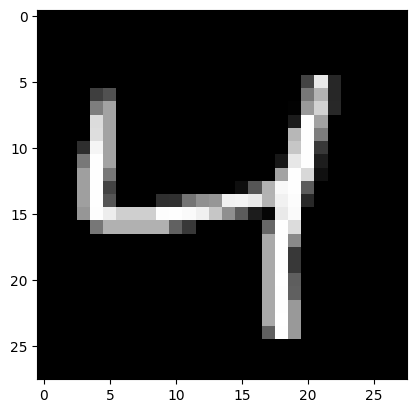

Label: 1


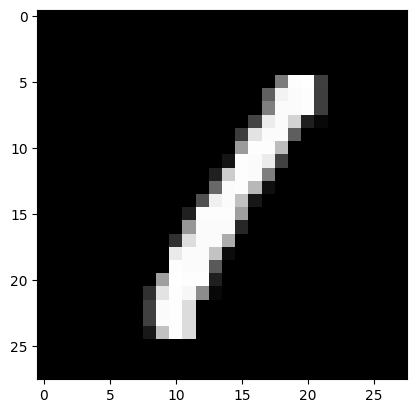

Label: 9


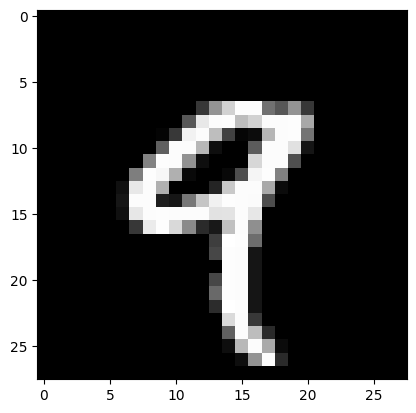

Label: 2


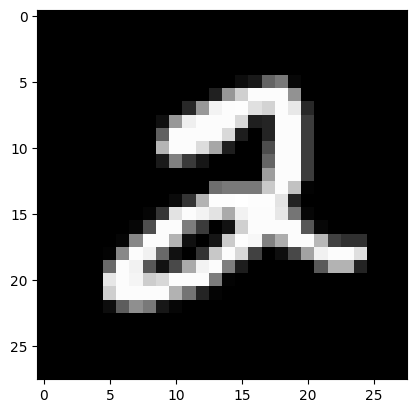

Label: 1


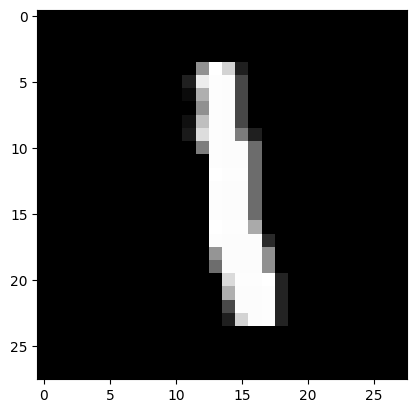

Label: 3


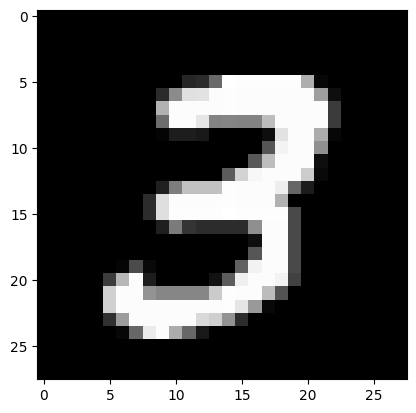

Label: 1


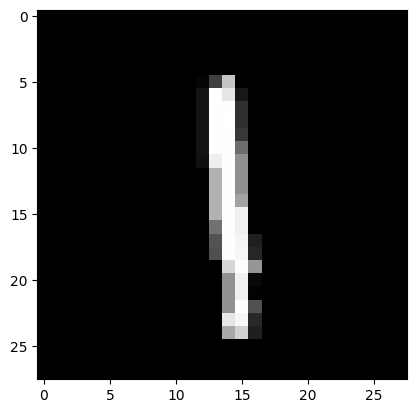

Label: 4


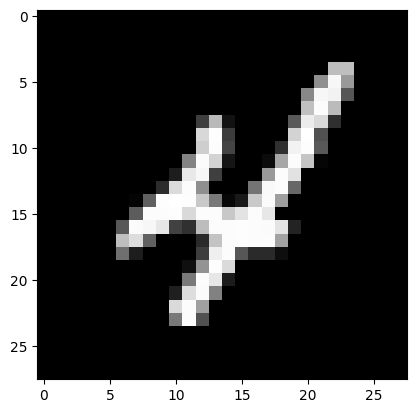

In [432]:
for N in range(10):
  print("Label:", y_train[N])
  plt.imshow(x_train[N], cmap="gray")
  plt.show()

# Create the Neural Network

In [433]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ]
)

# Show how to make predictions (before training the net)

In [434]:
predictions = model(x_train[:1])
predictions

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.19203529,  0.57329535, -0.01728807,  0.20106818, -0.44090205,
        -0.14349364, -0.00350665,  0.47954336,  0.11090267, -0.5372627 ]],
      dtype=float32)>

In [435]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.07764981, 0.16692418, 0.09247666, 0.11504376, 0.06054231,
        0.08151204, 0.09375994, 0.1519859 , 0.10512467, 0.05498067]],
      dtype=float32)>

In [436]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [437]:
loss_fn(y_train[:1], predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5070045>

In [438]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"], jit_compile=True)

In [439]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=2400)

Epoch 1/100
20/20 [==============================] - 2s 34ms/step - loss: 1.2742 - accuracy: 0.6402 - val_loss: 0.4168 - val_accuracy: 0.8827
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4570 - accuracy: 0.8597 - val_loss: 0.2764 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3223 - accuracy: 0.9055 - val_loss: 0.2219 - val_accuracy: 0.9336
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.2623 - accuracy: 0.9235 - val_loss: 0.1872 - val_accuracy: 0.9448
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.2238 - accuracy: 0.9341 - val_loss: 0.1641 - val_accuracy: 0.9522
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1977 - accuracy: 0.9427 - val_loss: 0.1478 - val_accuracy: 0.9572
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1749 - accuracy: 0.9478 - val_loss: 0.1336 - val_accuracy: 0.9607
Epoch 8/100


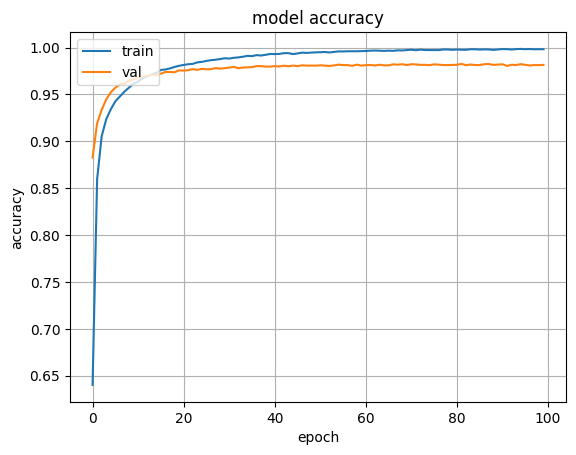

In [440]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [441]:
eval = model.evaluate(x_test, y_test, verbose=2)
for name, ev in zip(model.metrics_names, eval):
    print(name, ev)

313/313 - 1s - loss: 0.0749 - accuracy: 0.9831 - 1s/epoch - 3ms/step
loss 0.07493793964385986
accuracy 0.9830999970436096


In [442]:
tf.math.confusion_matrix(y_test, tf.argmax(model(x_test), axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    2,    1,    0,    2,    2,    1,    0,    0],
       [   0, 1125,    4,    0,    0,    1,    2,    1,    2,    0],
       [   2,    2, 1017,    3,    1,    0,    1,    4,    2,    0],
       [   1,    0,    2,  993,    0,    4,    0,    3,    2,    5],
       [   0,    0,    4,    0,  966,    0,    3,    2,    1,    6],
       [   3,    0,    0,    7,    1,  875,    3,    0,    2,    1],
       [   5,    2,    2,    1,    4,    4,  940,    0,    0,    0],
       [   1,    4,   10,    1,    0,    0,    0, 1008,    2,    2],
       [   3,    0,    3,    4,    3,    4,    1,    3,  949,    4],
       [   3,    2,    0,    3,    6,    2,    0,    7,    0,  986]],
      dtype=int32)>

# Convert model to TFLite

openmv passes a 28x28x1 tensor, not 28x28 - so we need to add a reshape

In [443]:
openmv_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((28, 28), input_shape=(28, 28, 1)),
        model,
    ]
)

quantize the model

In [444]:
def representative_dataset():
    for image in x_test:
        img = tf.expand_dims(image, axis=2)
        yield [np.array([[img]], dtype=np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(openmv_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_quant_model = converter.convert()

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


save the model

In [445]:
with open("model.tflite", "wb") as output:
    print("size:", len(tflite_quant_model))
    output.write(tflite_quant_model);

size: 239208
